![tf2](https://miro.medium.com/max/1000/1*RGSPW8Zfs4W70SYrIu3xFA.png)

**The CIFAR-10 dataset*()

![](https://sichkar-valentyn.github.io/cifar10/images/CIFAR-10_examples.png)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

TensorFlow 2.x selected.


# New Section

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to a pixel value range of [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# The data, split between train and test sets:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

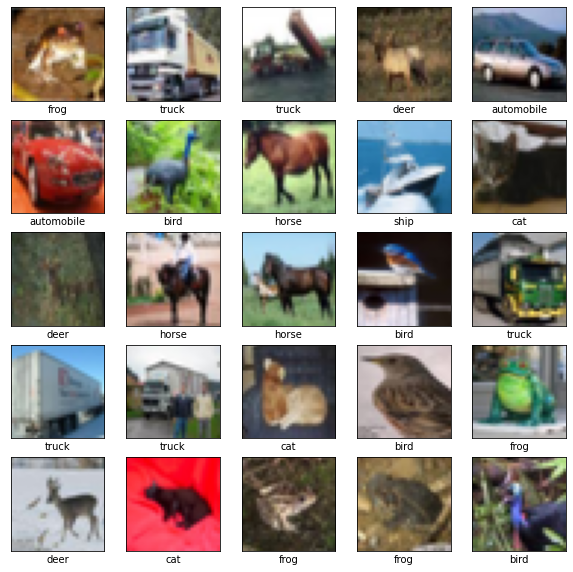

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [0]:
# # Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [0]:
# Define a ModelCheckpoint callback to persist the model after every epoch.
cp_callback = tf.keras.callbacks.ModelCheckpoint('checkpoint.hdf5', verbose=1, save_weights_only=False)

In [0]:
# Compile, i.e. configure the network with the Adam optimizer and the sparse_categorical_crossentropy loss.
# Furthermore, keep track of the model's accuracy metric and have it printed out during training.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
# Actually train the model for 15 epochs, i.e. show the model all the training data 15 times.
# To be able to judge the model's performance, also provide the test data. It will be evaluated after
# every epoch and the results will be printed to the console.
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), callbacks=[cp_callback])


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
49920/50000 [============================>.] - ETA: 0s - loss: 1.5061 - accuracy: 0.4481
Epoch 00001: saving model to checkpoint.hdf5
50000/50000 [==============================] - 10s 208us/sample - loss: 1.5060 - accuracy: 0.4482 - val_loss: 1.2288 - val_accuracy: 0.5617
Epoch 2/15
49760/50000 [============================>.] - ETA: 0s - loss: 1.1386 - accuracy: 0.5971
Epoch 00002: saving model to checkpoint.hdf5
50000/50000 [==============================] - 8s 164us/sample - loss: 1.1383 - accuracy: 0.5973 - val_loss: 1.0412 - val_accuracy: 0.6369
Epoch 3/15
49696/50000 [============================>.] - ETA: 0s - loss: 0.9676 - accuracy: 0.6604
Epoch 00003: saving model to checkpoint.hdf5
50000/50000 [==============================] - 8s 164us/sample - loss: 0.9679 - accuracy: 0.6604 - val_loss: 0.9527 - val_accuracy: 0.6696
Epoch 4/15
49824/50000 [============================>.] - ETA: 0s - loss: 0.8669 - accuracy: 0.69

In [0]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

url = 'https://i.ytimg.com/vi/YCaGYUIfdy4/maxresdefault.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img2 = img

In [0]:
img = img.resize((32,32))
img = np.array(img, dtype=np.float32)
img /= 255

In [18]:
prob = model.predict(img.reshape(1,32,32,3))
prob

array([[-0.8617854 , -7.304472  ,  2.3823154 ,  3.9753847 ,  2.5812109 ,
         2.8311086 , -0.82253003, -0.23470867, -1.1075841 , -2.18044   ]],
      dtype=float32)

In [0]:
label = {
0 : 'airplane',
1 : 'automobile',
2 : 'bird',
3 : 'cat',
4 : 'deer',
5 : 'dog',
6 : 'frog',
7 : 'horse',
8 : 'ship',
9 : 'truck'
}

Text(0.5, 1.0, 'This is a(n) cat!')

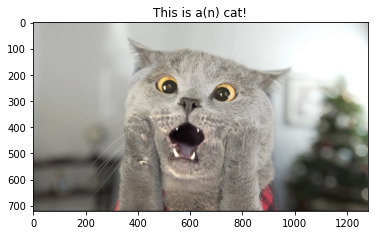

In [20]:
predict_class = np.argmax(prob, axis=1)


plt.imshow(img2)
plt.title("This is a(n) " + label[predict_class[0]] + "!")